#### William Pulkownik Applied Stats - Smith - Spring 2020

## Project 5: Launching a Successful Kickstarter

In [28]:
# Imports pandas, which lets us use Data Frames. 
import pandas as pd

# Imports plotting functionality.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# We need this for our simulations. 
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm
from scipy import integrate
# make a print yellow func
def prYellow(skk): print("\033[93m {}\033[00m" .format(skk))

In [2]:
# Imports our data from 'train.csv' in the 'data' folder. 
kickstarters = pd.read_csv('data/kickstarter.csv')

# .head(10) shows the first ten entries of a data frame by default. 
kickstarters.head(10)

/home/mongoose/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,category,state,backers,country,usd pledged,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Publishing,failed,0,GB,0,NaN,NaN,NaN,NaN
1,Film & Video,failed,3,US,220,NaN,NaN,NaN,NaN
2,Music,failed,1,US,1,NaN,NaN,NaN,NaN
3,Film & Video,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,Food,successful,224,US,52375,NaN,NaN,NaN,NaN
5,Food,successful,16,US,1205,NaN,NaN,NaN,NaN
6,Food,failed,40,US,453,NaN,NaN,NaN,NaN
7,Design,canceled,58,US,8233,NaN,NaN,NaN,NaN
8,Film & Video,canceled,43,US,6240.57,NaN,NaN,NaN,NaN
9,Publishing,failed,0,CA,0,NaN,NaN,NaN,NaN


In [3]:
columns_to_change = {'backers', 'usd pledged'}
for col in columns_to_change:
    kickstarters[col] = pd.to_numeric(kickstarters[col], errors='coerce')
    
del kickstarters['Unnamed: 5']
del kickstarters['Unnamed: 6']
del kickstarters['Unnamed: 7']
del kickstarters['Unnamed: 8']

#kickstarters.dropna(inplace=True)

## Question 1: I'll Pick <font color=blue> Technology <font>

In [4]:
# Question 1 - Pick a category from the below list that sounds interesting to you!
kickstarters['category'].value_counts().head(15)

Film & Video    57679
Music           46744
Publishing      34233
Games           28008
Technology      26128
Art             23975
Design          23872
Food            21229
Fashion         18398
Theater          9972
Photography      9680
Comics           8753
Crafts           7187
Journalism       4073
Dance            3375
Name: category, dtype: int64

## Question 2:

In [5]:
# Question 2 - Change the category to the one you chose!
my_category = kickstarters[kickstarters.category == 'Technology']
len(my_category)

26128

In [6]:
numerator = len(my_category[my_category.state == 'successful'])

In [7]:
# Question 3
numerator/len(my_category)

0.1937385180649112

## Question 3: about 19.37% of tech startups are successful

In [8]:
# Set-up for Question 4
counts = my_category['state'].value_counts()

In [9]:
counts[counts > 3]

failed        16347
successful     5062
canceled       3749
live            632
suspended       323
Name: state, dtype: int64

## Question 4: the values that concern me are the state keys with numerical values. 
The data should be string format like the first 6 keys. The number of failures doesn't really bother me. many business ideas are not successful. The undefined, i will drop because it is small. the cancelled are valuable because they are large and could be valuable (like failures). I am concerned with the 'live' count because they do not provide much valuable status information at this time.

In [10]:
my_category = my_category[my_category['state'].isin(counts[counts>3].index)]

In [11]:
my_category = my_category[my_category.state != 'live']

In [12]:
my_category['state'].value_counts()

failed        16347
successful     5062
canceled       3749
suspended       323
Name: state, dtype: int64

In [13]:
prYellow(numerator/len(my_category))

 0.1986578234763157


### we can see that getting rid of those values raises our success by .5%

## Question 5:
### a. null and alt hypothesis
H[0]: P = .35
H[1]: P != .35
### b. sample statistic
### c. critical val and p-val method (alpha= 0.05)
### d. conclusion

In [21]:
n = len(my_category)
x = numerator
alfa = .05
p_hat = (x/n)
p = .35
print(f'for sample size: {n} p-hat: {p_hat:.4f}, test the claim that p-hat difers from p ({p})')

for sample size: 25481 p-hat: 0.1987, test the claim that p-hat difers from p (0.35)


In [24]:
# calculate our Z and P-values with statsmodels 
# return both respectively
stat, pval = sm.stats.proportions_ztest(x, n, p, alternative='two-sided')

In [42]:
print(f'B: critical value = {stat:.2f}, p-value = {pval}')

B: critical value = -60.55, p-value = 0.0


### Conclusion : at the 0.05 level of significance there is sufficient evidence to support the claim that my category's rate of success differs from the population success rate of 0.35

### Question 7: Plot the graph

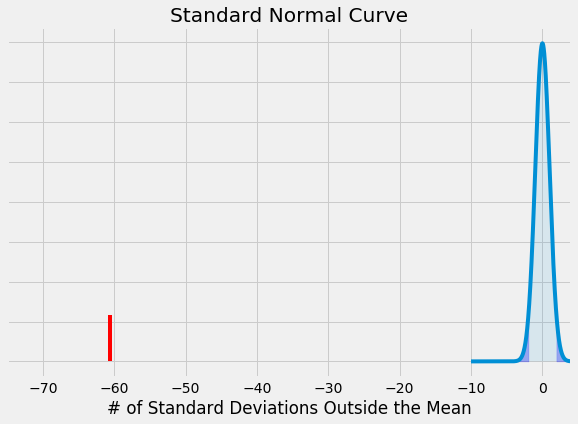

In [41]:
x = np.arange(-4, -1.96, 0.001)
x1 = np.arange(1.96, 4, 0.001)
x_all = np.arange(-10, 10, 0.001) # entire range of x
y = norm.pdf(x,0,1)
y1 = norm.pdf(0,x1,1)
y2 = norm.pdf(x_all,0,1)
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x1,y1,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-75,4])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Standard Normal Curve')
plt.vlines(stat, 0, y1, color='r')
plt.show()

#### Question 8: would you use kickstarter for your category?
Based on the numbers (I double checked on paper) I would not want to use a kickstarter to fund a new technology project because the ~20% chance of success is low enough, especially when you consider that it is well outside the norm for other kickstarter ventures.